Der Scatterplot wurde als PNG unter 'E:/Datenerhebung MA/Plots & Auswertung/knee/kalibrationsfiles/scatterplot_MAN262_mediapipe_2.png' gespeichert.


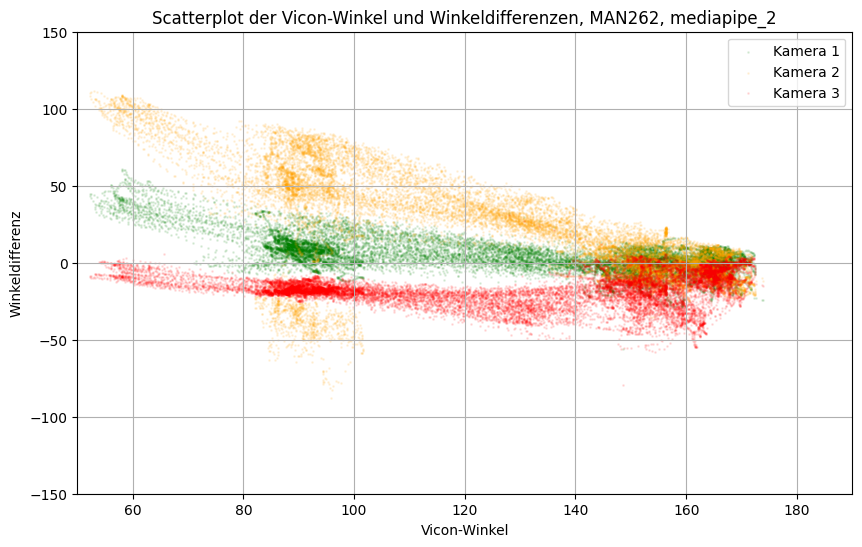

In [21]:

import pandas as pd
import matplotlib.pyplot as plt

person = 'MAN262'
model = 'mediapipe_2'
# CSV-Datei laden
file_path = f"E:/Datenerhebung MA/PoseFormerV2 Daten/{person}/angles_csv/knee/all_trials_angles.csv"
#file_path2 = 'E:/Datenerhebung MA/PoseFormerV2 Daten/merged_output.csv'
df = pd.read_csv(file_path)

# Scatterplot erstellen
plt.figure(figsize=(10, 6))

# Kamera 1
plt.scatter(df['Vicon_Angles'], df['Cam1_Difference'], label='Kamera 1', alpha=0.1, s=1, color= 'green')
# Kamera 2
plt.scatter(df['Vicon_Angles'], df['Cam2_Difference'], label='Kamera 2', alpha=0.1, s=1, color= 'orange')
# Kamera 3
plt.scatter(df['Vicon_Angles'], df['Cam3_Difference'], label='Kamera 3', alpha=0.1, s=1, color= 'red')


# Achsen anpassen (fixieren)
plt.xlim([50, 190])  # Puffer um die Daten
plt.ylim([-150, 150])  # Beispielbereich für die Winkeldifferenzen

# Plot anpassen
plt.xlabel('Vicon-Winkel')
plt.ylabel('Winkeldifferenz')
plt.title(f'Scatterplot der Vicon-Winkel und Winkeldifferenzen, {person}, {model}')
plt.legend()
plt.grid(True)

# Plot als PNG speichern
output_path = f"E:/Datenerhebung MA/Plots & Auswertung/knee/kalibrationsfiles/scatterplot_{person}_{model}.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Plot anzeigen
#plt.show()

print(f"Der Scatterplot wurde als PNG unter '{output_path}' gespeichert.")

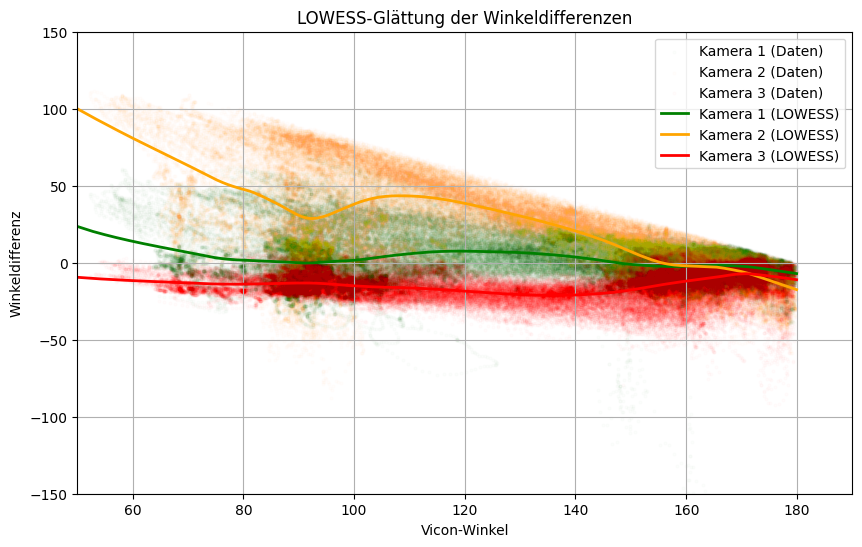

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Beispiel: CSV-Datei laden
file_path = "E:/Datenerhebung MA/PoseFormerV2 Daten/merged_output.csv"
df = pd.read_csv(file_path)

# LOWESS-Glättung für jede Kamera anwenden
# Der Parameter 'frac' bestimmt den Glättungsgrad (0.2 bis 0.3 ist oft ein guter Startwert)
frac = 0.2  # Glättungsparameter

# LOWESS anwenden
lowess_cam1 = lowess(df['Cam1_Difference'], df['Vicon_Angles'], frac=frac)
lowess_cam2 = lowess(df['Cam2_Difference'], df['Vicon_Angles'], frac=frac)
lowess_cam3 = lowess(df['Cam3_Difference'], df['Vicon_Angles'], frac=frac)

# Plot erstellen
plt.figure(figsize=(10, 6))

# Scatterplots (Originaldaten)
plt.scatter(df['Vicon_Angles'], df['Cam1_Difference'], label='Kamera 1 (Daten)', alpha=0.01, s=5, color='green')
plt.scatter(df['Vicon_Angles'], df['Cam2_Difference'], label='Kamera 2 (Daten)', alpha=0.01, s=5, color='orange')
plt.scatter(df['Vicon_Angles'], df['Cam3_Difference'], label='Kamera 3 (Daten)', alpha=0.01, s=5, color='red')

# Glättungskurven
plt.plot(lowess_cam1[:, 0], lowess_cam1[:, 1], label='Kamera 1 (LOWESS)', color='green', linewidth=2)
plt.plot(lowess_cam2[:, 0], lowess_cam2[:, 1], label='Kamera 2 (LOWESS)', color='orange', linewidth=2)
plt.plot(lowess_cam3[:, 0], lowess_cam3[:, 1], label='Kamera 3 (LOWESS)', color='red', linewidth=2)

# Achsen und Layout
plt.xlabel('Vicon-Winkel')
plt.ylabel('Winkeldifferenz')
plt.title('LOWESS-Glättung der Winkeldifferenzen')
plt.xlim([50, 190])
plt.ylim([-150, 150])
plt.legend()
plt.grid(True)

# Plot anzeigen
plt.show()


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as np

# CSV-Datei laden
file_path = "E:/Datenerhebung MA/PoseFormerV2 Daten/merged_output.csv"
df = pd.read_csv(file_path)

# LOWESS-Glättung für jede Kamera anwenden
frac = 0.2  # Glättungsparameter

# LOWESS anwenden
lowess_cam1 = lowess(df['Cam1_Difference'], df['Vicon_Angles'], frac=frac)
lowess_cam2 = lowess(df['Cam2_Difference'], df['Vicon_Angles'], frac=frac)
lowess_cam3 = lowess(df['Cam3_Difference'], df['Vicon_Angles'], frac=frac)

# Funktion, um den nächstgelegenen Wert zu finden
def get_value_at_angle(lowess_data, target_angle):
    closest_index = (np.abs(lowess_data[:, 0] - target_angle)).argmin()
    return lowess_data[closest_index, 1]

# Werte für Winkel von 0 bis 180° berechnen
angles = np.arange(0, 181, 1)  # Bereich von 0 bis 180°
results = {
    'Vicon_Angle': angles,
    'Cam1_Difference': [get_value_at_angle(lowess_cam1, angle) for angle in angles],
    'Cam2_Difference': [get_value_at_angle(lowess_cam2, angle) for angle in angles],
    'Cam3_Difference': [get_value_at_angle(lowess_cam3, angle) for angle in angles]
}

# In ein DataFrame umwandeln
results_df = pd.DataFrame(results)

# CSV-Datei speichern
output_path = "E:/Datenerhebung MA/PoseFormerV2 Daten/lowess_results.csv"
results_df.to_csv(output_path, index=False)

# Ausgabe der ersten Zeilen zur Kontrolle
print(results_df.head())

# Bestätigung der Speicherung
print(f"Die LOWESS-Ergebnisse wurden in '{output_path}' gespeichert.")


   Vicon_Angle  Cam1_Difference  Cam2_Difference  Cam3_Difference
0            0        60.465595       160.945212        -1.205007
1            1        60.465595       160.945212        -1.205007
2            2        60.465595       160.945212        -1.205007
3            3        60.465595       160.945212        -1.205007
4            4        60.465595       160.945212        -1.205007
Die LOWESS-Ergebnisse wurden in 'E:/Datenerhebung MA/PoseFormerV2 Daten/lowess_results.csv' gespeichert.


In [16]:
import pandas as pd

# Laden der Daten
calibration_data = pd.read_csv('E:/Datenerhebung MA/PoseFormerV2 Daten/MAN262/angles_csv/flexion_extension/calibrationsfile.csv') #im Calibration file wird aus dem Schulterwinkel der Kniewinkel berechnet
lowess_data = pd.read_csv('E:/Datenerhebung MA/PoseFormerV2 Daten/lowess_results.csv')
poseformer_data = pd.read_csv('E:/Datenerhebung MA/PoseFormerV2 Daten/MAN262/angles_csv/knee/MAN262_05_squat_poseformer_left_angles.csv')

# Umwandeln in Dictionaries für schnellen Zugriff
calibration_dict = calibration_data.set_index('Frame')['kalibriert'].to_dict()
lowess_dict = lowess_data.set_index('Vicon_Angle')['Cam2_Difference'].to_dict()

# Funktion zur Berechnung des korrigierten Winkels
def calculate_corrected_angle(frame, original_angle):
    calibrated_value = calibration_dict.get(frame, None)
    if calibrated_value is None:
        return original_angle  # Falls kein kalibrierter Wert vorhanden ist

    calibrated_int = int(calibrated_value)
    cam2_difference = lowess_dict.get(calibrated_int, 0)  # Falls kein Wert vorhanden, wird 0 verwendet

    return original_angle - cam2_difference

# Berechnung des korrigierten Winkels für alle Frames
poseformer_data['Corrected_Poseformer_Angles_Cam2'] = poseformer_data.apply(
    lambda row: calculate_corrected_angle(row['Frame'], row['Poseformer_Angles_Cam2']), axis=1
)

# Speichern des aktualisierten DataFrames
poseformer_data.to_csv('E:/Datenerhebung MA/PoseFormerV2 Daten/MAN262/angles_csv/knee/test_gesamtLOWESScam2_MAN262_05_squat_corrected_angles.csv', index=False)

print("Korrigierte Winkel erfolgreich berechnet und gespeichert unter 'test_MAN262_05_squat_corrected_angles.csv'")


Korrigierte Winkel erfolgreich berechnet und gespeichert unter 'test_MAN262_05_squat_corrected_angles.csv'


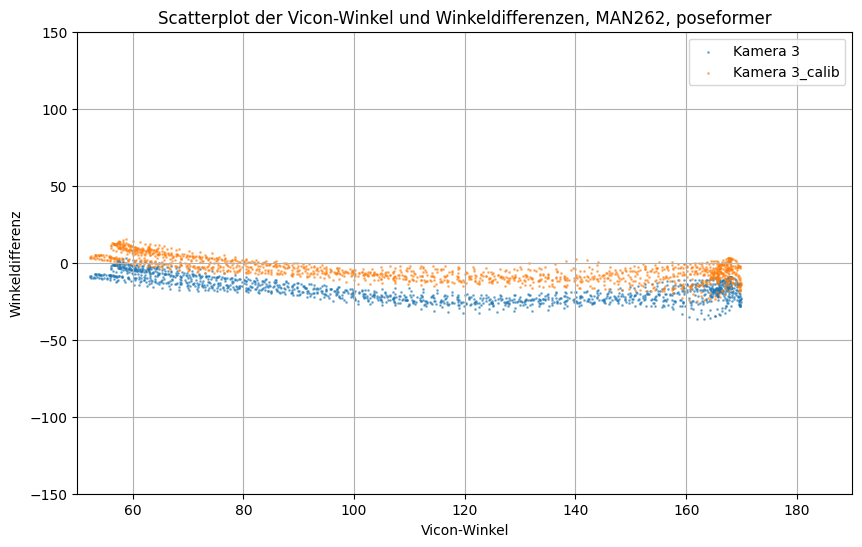

Der Scatterplot wurde als PNG unter 'E:/Datenerhebung MA/Plots & Auswertung/knee/kalibrationsfiles/scatterplot_MAN262_poseformer.png' gespeichert.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

person = 'MAN262'
model = 'poseformer'
# CSV-Datei laden
file_path = f"E:/Datenerhebung MA/PoseFormerV2 Daten/{person}/angles_csv/knee/test_MAN262_05_squat_corrected_angles.csv"
file_path2 = f"E:/Datenerhebung MA/PoseFormerV2 Daten/{person}/angles_csv/knee/test_gesamtLOWESS_MAN262_05_squat_corrected_angles.csv"
df = pd.read_csv(file_path)
df2 = pd.read_csv(file_path2)

# Scatterplot erstellen
plt.figure(figsize=(10, 6))

# Kamera 1
#plt.scatter(df['Vicon_Angles'], df['Cam1_Difference'], label='Kamera 1', alpha=0.1, s=1)
# Kamera 2
#plt.scatter(df['Vicon_Angles'], df['Cam2_Difference'], label='Kamera 2', alpha=0.1, s=1)
# Kamera 3
plt.scatter(df['Vicon_Angles'], df['Cam3_Difference'], label='Kamera 3', alpha=0.5, s=1)
# Kamera 3
#plt.scatter(df['Vicon_Angles'], df['corrected_cam2_diff'], label='Kamera 2_calib', alpha=0.5, s=1)

# Kamera 3
plt.scatter(df2['Vicon_Angles'], df2['corrected_cam3_diff'], label='Kamera 3_calib', alpha=0.5, s=1)


# Achsen anpassen (fixieren)
plt.xlim([50, 190])  # Puffer um die Daten
plt.ylim([-150, 150])  # Beispielbereich für die Winkeldifferenzen

# Plot anpassen
plt.xlabel('Vicon-Winkel')
plt.ylabel('Winkeldifferenz')
plt.title(f'Scatterplot der Vicon-Winkel und Winkeldifferenzen, {person}, {model}')
plt.legend()
plt.grid(True)

# Plot als PNG speichern
output_path = f"E:/Datenerhebung MA/Plots & Auswertung/knee/kalibrationsfiles/scatterplot_{person}_{model}.png"
#plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Plot anzeigen
plt.show()

print(f"Der Scatterplot wurde als PNG unter '{output_path}' gespeichert.")

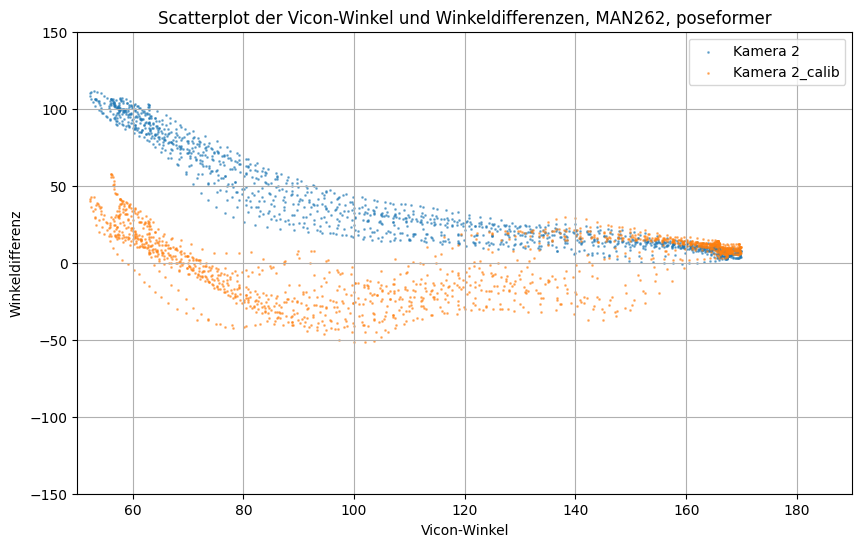

Der Scatterplot wurde als PNG unter 'E:/Datenerhebung MA/Plots & Auswertung/knee/kalibrationsfiles/scatterplot_MAN262_poseformer.png' gespeichert.


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

person = 'MAN262'
model = 'poseformer'
# CSV-Datei laden
file_path = f"E:/Datenerhebung MA/PoseFormerV2 Daten/{person}/angles_csv/knee/test_gesamtLOWESScam2_MAN262_05_squat_corrected_angles.csv"
df = pd.read_csv(file_path)


# Scatterplot erstellen
plt.figure(figsize=(10, 6))


# Kamera 2
plt.scatter(df['Vicon_Angles'], df['Cam2_Difference'], label='Kamera 2', alpha=0.5, s=1)


# Kamera 3
plt.scatter(df['Vicon_Angles'], df['corrected_cam2_diff'], label='Kamera 2_calib', alpha=0.5, s=1)



# Achsen anpassen (fixieren)
plt.xlim([50, 190])  # Puffer um die Daten
plt.ylim([-150, 150])  # Beispielbereich für die Winkeldifferenzen

# Plot anpassen
plt.xlabel('Vicon-Winkel')
plt.ylabel('Winkeldifferenz')
plt.title(f'Scatterplot der Vicon-Winkel und Winkeldifferenzen, {person}, {model}')
plt.legend()
plt.grid(True)

# Plot als PNG speichern
output_path = f"E:/Datenerhebung MA/Plots & Auswertung/knee/kalibrationsfiles/scatterplot_{person}_{model}.png"
#plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Plot anzeigen
plt.show()

print(f"Der Scatterplot wurde als PNG unter '{output_path}' gespeichert.")

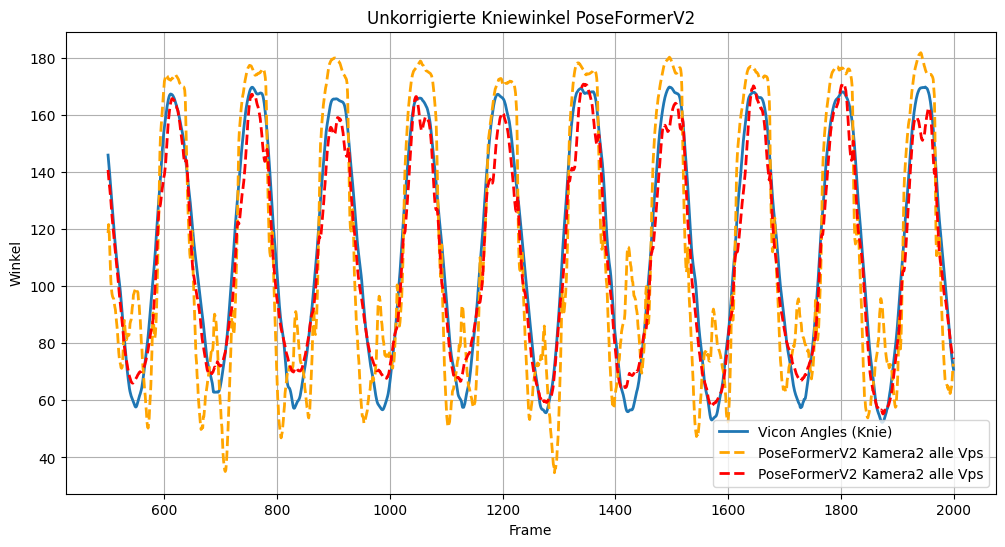

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Dateien laden
file_path_1 = r'E:\Datenerhebung MA\PoseFormerV2 Daten\MAN262\angles_csv\knee\test_gesamtLOWESScam2_MAN262_05_squat_corrected_angles.csv'
file_path_2 = r'E:\Datenerhebung MA\PoseFormerV2 Daten\MAN262\angles_csv\knee\test_gesamtLOWESS_MAN262_05_squat_corrected_angles.csv'



df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)


# Plot der "Vicon_Angles" aus beiden Datensätzen
plt.figure(figsize=(12, 6))

# Plot für den ersten Datensatz
plt.plot(df1['Frame'], df1['Vicon_Angles'], label='Vicon Angles (Knie)', linewidth=2)

# Plot für den zweiten Datensatz
plt.plot(df1['Frame'], df1['Corrected_Poseformer_Angles_Cam2'], label='PoseFormerV2 Kamera2 alle Vps', linewidth=2, linestyle='--', color='orange')

# Plot für den dritten Datensatz
plt.plot(df2['Frame'], df2['Corrected_Poseformer_Angles_Cam3'], label='PoseFormerV2 Kamera2 alle Vps', linewidth=2, linestyle='--', color='red')

# Plot-Details
plt.xlabel('Frame')
plt.ylabel('Winkel')
plt.title('Unkorrigierte Kniewinkel PoseFormerV2')
plt.legend()
plt.grid(True)

# Plot anzeigen
plt.show()


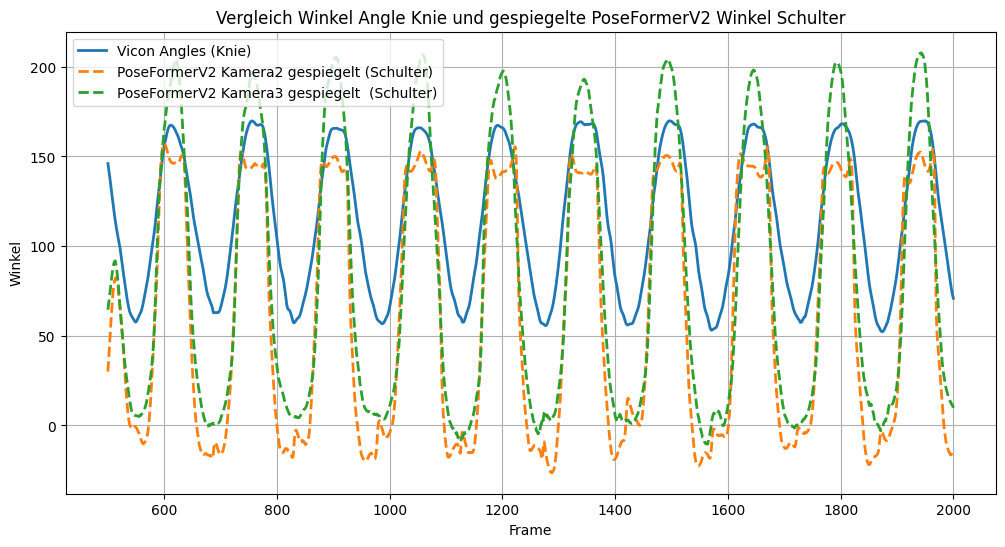

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Dateien laden
file_path_1 = r'E:\Datenerhebung MA\PoseFormerV2 Daten\MAN262\angles_csv\knee\test_MAN262_05_squat_corrected_angles.csv'
file_path_2 = r'E:\Datenerhebung MA\PoseFormerV2 Daten\MAN262\angles_csv\flexion_extension/calibrationsfile.csv'
file_path_3 = r'E:\Datenerhebung MA\PoseFormerV2 Daten\MAN262\angles_csv\flexion_extension/calibrationsfile_cam3.csv'


df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)
df3 = pd.read_csv(file_path_3)

# Plot der "Vicon_Angles" aus beiden Datensätzen
plt.figure(figsize=(12, 6))

# Plot für den ersten Datensatz
plt.plot(df1['Frame'], df1['Vicon_Angles'], label='Vicon Angles (Knie)', linewidth=2)

# Plot für den zweiten Datensatz
plt.plot(df2['Frame'], df2['gespiegelt'], label='PoseFormerV2 Kamera2 gespiegelt (Schulter)', linewidth=2, linestyle='--')

# Plot für den dritten Datensatz
plt.plot(df3['Frame'], df3['gespiegelt'], label='PoseFormerV2 Kamera3 gespiegelt  (Schulter)', linewidth=2, linestyle='--')

# Plot-Details
plt.xlabel('Frame')
plt.ylabel('Winkel')
plt.title('Vergleich Winkel Angle Knie und gespiegelte PoseFormerV2 Winkel Schulter')
plt.legend()
plt.grid(True)

# Plot anzeigen
plt.show()
